# Gradient descent with Goldstein-Price line-search in dimension one


In [9]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100  # parameter for resolution of graphics
import time

v = 1  # variant corresponding to the number of the function below
Maxiter = 1000 # Number of iterations
x0 = 2.5 # Initialization
a = -2.5   # Lower bound for the plot interval
b = 2.5    # Upper bound for the plot interval
Tol = 1e-15

InitStep = 1  # initial step
m1 = 0.1    #Parameters for Goldstein-Price
m2 = 0.9

## Various objective functions

Here we consider multiple functions to be tested with Newton's method

Case 0: $f(x) = x^2$ (quadratic function, convergence in $1$ iteration)

Case 1: $f(x) = x^6/6-x^2/2+x$ (here the choice of the initialization is important)

Case 2: $f(x) = x^2-\sin x$ 

Case 3: $f(x) = x^2+\exp x$

Case 4: $f(x) = x^4$ (this does not verify the non-degeneracy hypothesis: quadratic convergence is not attained)

Case 5: $f(x) = \sqrt{1+x^2}$ (here the choice of initialization is important: for $|x|<1$ we have cubic convergence, while for $|x|\geq 1$ the algorithm diverges)

In [11]:
def fun(x,v):                   # function definition
    if v==0:
        return x**2
    if v==1:
        return x**6/6-x**2/2+x
    if v==2:
        return x**2-np.sin(x)
    if v==3:
        return x**2+np.exp(x)
    if v==4:
        return x**4
    if v==5:
        return np.sqrt(1+x**2)
def der(x,v):                   # first derivative
    if v==0:
        return 2*x
    if v==1:
        return x**5-x+1
    if v==2:
        return 2*x-np.cos(x)
    if v==3: 
        return 2*x+np.exp(x)
    if v==4:
        return 4*x**3
    if v==5:
        return x/np.sqrt(1+x**2)
def der2(x,v):                  # second derivative
    if v==0: 
        return 2
    if v==1:
        return 5*x**4-1
    if v==2: 
        return 2+np.sin(x)
    if v==3:
        return 2+np.exp(x)
    if v==4:
        return 12*x**2
    if v==5:
        return 1/np.sqrt(1+x**2)**3

# List of optimizers for the above functions
if v==0:
    analytic = 0
    p=1
if v==1:
    analytic = -1.1673039782614187
    p=1
if v==2:
    analytic = 0.45018361129487355
    p=1
if v==3:
    analytic = -0.35173371124919584
    p=1
if v==4:
    analytic = 0
    p=1
if v==5:
    analytic = 0
    p=1

## Algorithm: Gradient Goldstein-Price line search

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

 **Initialization:** Start with $t_l=t_r=0$ and pick an initial $t>0$.

 **Iterate:** 
 - **Step 1**
    - **if** (a) then exit: you found a good $t$
    - **if** (b) then $t_r = t$: you found a new upper bound for $t$
    - **if** (c) then $t_l = t$: you found a good new lower bound for $t$
 - **Step 2**
    - **if** no valid $t_r$ exists then choose a new $t>t_r$
    - **else** choose a new $t \in (t_l,t_r)$
   </div>


Recall the three conditions

$\star$ $m_1,m_2 \in (0,1)$ are chosen constants such that $m_1<0.5$ and $m_2>0.5$.

(a) $m_2 q'(0) \leq \frac{q(t)-q(0)}{t} \leq m_1 q'(0)$ (then we have a good $t$)

(b) $m_1q'(0)< \frac{q(t)-q(0)}{t}$ (then $t$ is too big)

(c) $\frac{q(t)-q(0)}{t}<m_2q'(0)$ (then $t$ is too small)

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

 **Initialization:** Choose the starting point $x_0$ and the step $t>0$.

 **Step $i$:** 
   - Compute $f(x_{i-1}),f'(x_{i-1})$
   - compute the step size using the Goldstein-Price rule: consider the initial step $t = t_0$, parameters $m_1<0.5, m_2>0.5$, and consider the initial bounds equal to zero: $t_l=0,t_r=0$ and pick an initial $t>0$.
   - replace $i$ with $i+1$ and loop
</div>

**Remarks** 

1. You should stop the line search when the step size is too small
2. If the difference $|f(x_i)-f(x_{i-1})|$ is too small you may decide to stop the optimization algorithm.
<!--3. You should write the condition in the line-search loop so that you do not compare something with the gradient squared: note that $q'(0) = f'(x)d = -(f'(x))^2$ when $d=-f'(x)$. If you do this, the algorithm will stop when $|f'(x)|<\sqrt{\varepsilon}$ which means you won't get precision better than the square root of the machine epsilon (typically around $10^{-8}$). You can use square roots when the quantities are positive to avoid this behavior. -->

In [12]:
def GD(f,df,x0,tol,maxiter,m1,m2):
    phist = []
    vhist = []
    ghist = []
    phist.append(x0)            # Create an array which holds the optimization history
 
    val = f(x0,v)
    d   = -df(x0,v)
    #d = d/abs(d)
    vhist.append(val)
    ghist.append(d)
    iter = 1
    step = 1
    prevval = val

    while abs(d)>=tol: 
        #Line search
        tl=0
        tr=0
        t=1
        #np.sqrt(abs((f(x0+step*d,v)-val)))/step<np.sqrt(abs(-(m1*(d*d))))
        while (1==1):
            qt = f(x0+t*d,v)
            qp = -d*d # here this is q'(0) 
            #print(tl," ",tr)
            if ((qt-val)/t<=(m1*qp)) and ((qt-val)/t>=(m2*qp)):
                step=t   # we found a good step
                break
            elif ((qt-val)/t>(m1*qp)):
                # step too big
                tr = t
            else:   # ((qt-val)/t<(m2*qp))
                # step too small
                tl = t
            if(tr==0):
                t = 2*tl
            else:
                t = 0.5*(tl+tr)
            if abs(tr-tl)<=(tol):
                print("Something wrong")
                break
        #print(step)
        x0 = x0+step*(d)
        val = f(x0,v)
        d   = -df(x0,v)
        #d = d/abs(d)

        print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(d))

        phist.append(x0)
        vhist.append(val)
        ghist.append(d)
        iter=iter+1
        if(iter>maxiter):
            print('Maximum number of iterations reached!')
            break
       
        prevval = val
        if(abs(step*d)<Tol): 
            print('Algorithm converged!')
    return phist,vhist,ghist

Iter:  1 | Val:  -0.6295756109683195 | Step:  0.03125  Grad:  1.4720768388091967
Iter:  2 | Val:  -0.8646230786369447 | Step:  0.65625  Grad:  4.415031716946713
Iter:  3 | Val:  -1.2409471964431968 | Step:  0.125  Grad:  1.2633533522989921
Iter:  4 | Val:  -1.3196658751345156 | Step:  0.3125  Grad:  1.6011549251717527
Iter:  5 | Val:  -1.3879943082372048 | Step:  0.15625  Grad:  0.7021076065914593
Iter:  6 | Val:  -1.4034815894767017 | Step:  0.25  Grad:  0.6829657324690426
Iter:  7 | Val:  -1.4147954567675485 | Step:  0.1875  Grad:  0.41739406251356037
Iter:  8 | Val:  -1.4216021886096004 | Step:  0.21875  Grad:  0.3113520624363637
Iter:  9 | Val:  -1.424782413870124 | Step:  0.1875  Grad:  0.18404631128143745
Iter:  10 | Val:  -1.4257258963985628 | Step:  0.21875  Grad:  0.14570384091958855
Iter:  11 | Val:  -1.4265196804160851 | Step:  0.1875  Grad:  0.08360087641900771
Iter:  12 | Val:  -1.4266854899164345 | Step:  0.21875  Grad:  0.06723541295185886
Iter:  13 | Val:  -1.4268209405

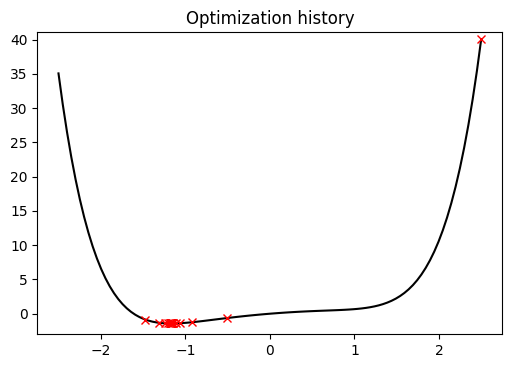

In [8]:
pp,vv,gg = GD(fun,der,x0,1e-8,Maxiter,0.1,0.2)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Analytical sol: ',analytic)

uplim = max(fun(a,v),fun(b,v))+1   # set limits for the plot window
dnlim = -3
t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
plt.figure(1)
plt.ylim([dnlim,uplim])            # Set upper bounds for the figure

plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]
plt.plot(pp,vv,'xr')

plt.title('Optimization history')
plt.show()

After the optimization loop, the convergence history and the order of convergence is computed. For each one of the functions a value $x^*$ close to the analytical solution is provided. The order of convergence is obtained by plotting the next error $|x_{n+1}-x^*|$ as a function of the previous error $|x_n-x^*|$. Since we want to find an eventual power law between these two, a log-log scale is used, since this turns power functions $x \mapsto Cx^p$ into lines with slope $p$.

(Note that if the number of iterations is too small (the method converged fast due to some miracle) then you won't be able to see anything in the error analysis.)

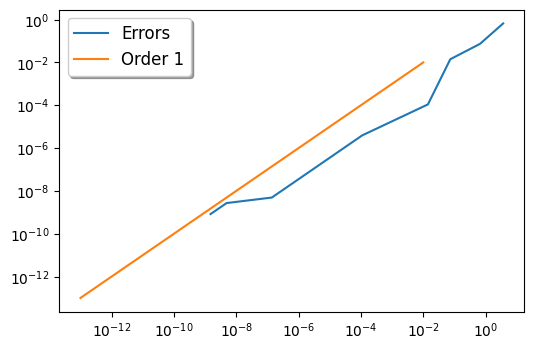

Ratio of convergence (approx) =  0.5531326731119445
Errors:  [3.66730398e+00 6.62421166e-01 7.36172536e-02 1.40839925e-02
 1.09231375e-04 3.89289669e-06 1.37863287e-07 4.88340390e-09
 2.70117018e-09 1.49410573e-09 8.26438695e-10]


In [74]:
Niter = len(pp)+1# Error analysis   
dis = np.linspace(1,Niter,Niter+1)
points = np.array(pp)
errors = abs(points-analytic)          # Compute differences between current points and the optimum
if(dis.size>10):
    dis2 = dis[0:7]
else:
    dis2 = dis
sq  = 0.01**dis2                      # Construct curve of order 1
#sq = 0.01*sq/sq[0]*errors[0]
#sq = sq/sq[-1]*errors[-1]
sq2 = 100*sq**2                      # Construct curve of order 2
#sq2 = sq2/sq2[-1]*errors[-1]
sq3 = 100*sq**3                      # Construct curve of order 3

plt.figure(2)
plt.loglog(errors[:-1:],errors[1:],label='Errors')  # Plot the errors in log-log plot
#plt.loglog(sq,sq2,label='Order 2')                  # Plot order curves for comparison
plt.loglog(sq,sq,label='Order 1')
#plt.loglog(sq,sq3,label='Order 3')
plt.legend(loc='best', shadow=True, fontsize='large')  # Show legend
plt.show()                                          # Show plot

ratio = errors[-1]/errors[-2]**p
print("Ratio of convergence (approx) = ",ratio)
print("Errors: ",errors)